In [1]:
import numpy as np;
import matplotlib.pyplot as plt;

class DecTreeNode:
    def __init__(self,x):
        self.val = x; # x should be a list containing both col and row
        self.left = None;
        self.right = None;
        #self.potential_cut = [];
        
class DecisionTree:
    # ----------------------------------------
    # No.1
    def Entropy(self,matrix):
        if len(matrix) == 0:
            return 0;
        p1 = np.sum(matrix[:,2]) / len(matrix);        
        if p1 == 1 or p1 == 0:            
            return 0;
        p2 = 1 - p1;                
        return -p1 * np.log2(p1) - p2 * np.log2(p2);
    
    # No.2
    def Info_gain(self,matrix,row):
        # row here indicates the row for spliting
        N = len(matrix);
        p1 = row / N;
        p2 = 1 - p1;
        
        target = self.Entropy(matrix);
        info1 = self.Entropy(matrix[:row,:]);
        info2 = self.Entropy(matrix[row:,:]);
        
        gain = target - p1 * info1 -p2 * info2; 
        return gain;
    # ----------------------------------------
    
    #No.3
    def Split(self,matrix):
        # for example [x1,x2,y] has 2 features
        N_features = len(matrix[0,:]) - 1;
        m_sort = [0] * N_features;
        # m_sorted is the matrix rearranged by a feature
        
        node_val = False; # if no splits happens, node_val remains False
        IG = 0;
        
        # this for listing all the potential split
        #----------------------------------------
        #potential_cut = [];
        #----------------------------------------
        
        for col in range(N_features):
            m_sort[col] = np.array(sorted(matrix, key = lambda x:x[col]));
            
            row = 1;
            while row < len(matrix):
                if m_sort[col][row,2] != m_sort[col][row-1,2]:
                    
                    #this_IG = self.Info_gain(m_sort[col],row);
                    this_bar = m_sort[col][row,col];
                    
                    
                    while m_sort[col][row ,col] == m_sort[col][row-1 ,col]:
                        #this_bar = m_sort[col][row,col];
                        row += 1;                        
                        if row  >= len(matrix):
                            #row = row - 1;
                            break;
                    
                    
                    this_IG = self.Info_gain(m_sort[col],row);
                    #this_bar = m_sort[col][row,col];
                    
                    ## potential cuts for q2-3
                    #potential_cut += [[col, this_bar, this_IG,]];
                    #potential_cut += [[col, this_bar, round(this_IG,4)]];
                    
                    # this is the info-gain of at a certain row
                    if this_IG > IG:
                        IG = this_IG; # Don't forget update the IG value!!!!!
                        bar = this_bar;
                        #bar = m_sort[col][row,col];
                        
                        node_val = [col,row,bar];
                        
                row += 1;
        
        # so the node_val has saved the info like which feature(by col) and which value(by bar);        
        if node_val != False:
            col = node_val[0];
            ## only for 2.3
            #return [node_val,m_sort[col],potential_cut];
            return [node_val,m_sort[col]];
        else:
            return False;
        
    # No.4
    def NodeTraining(self,x,matrix): # DFS algorithm
        out = self.Split(matrix);
        if not out:
            x.val = matrix[0,2];
        
        else:
            #node_val, m_sort, potential_cut = out[0], out[1], out[2];
            node_val, m_sort = out[0], out[1];
            x.val = [node_val[0],node_val[2]];
            x.left = DecTreeNode(None);
            x.right = DecTreeNode(None);
            ## only for 2.3
            #x.potential_cut = potential_cut;
            
            row = node_val[1];
            
            self.NodeTraining(x.left,m_sort[row:,:]);
            self.NodeTraining(x.right,m_sort[:row,:]);
            
            
            
    # No.5
    def Forward(self,inp,x):
        # inp = the input in the type of array
        x_val = x.val;
        if x.left != None or x.right != None:
            col = x_val[0];
            bar = x_val[1];
            if inp[col] >= bar:
                self.Forward(inp,x.left);
            else:
                self.Forward(inp,x.right);
        
        else:
            self.pred = x_val; 
                
    def Pred(self,inp,x):
        self.Forward(inp,x);
        return self.pred;
    
    
    # it is a way to see the layered structure of a binary tree
    #-----------------------------------------------------
    def TreeVisual(self,x):
        self.Vis = {};   
        
        ## only for 2.3
        #self.Cuts = {};
        
        self.DFS(x,0);
        
        tree = [];
        for i in self.Vis:
            tree += self.Vis[i];
            
        ## only for 2.3    
        #pot_cuts = [];
        #for i in self.Cuts:            
        #    pot_cuts += self.Cuts[i];
        
            
        print(tree);
        ## only for 2.3
        #print(pot_cuts)
        ## only for 2.7.1
        #cts = 0;
        #for i in tree:
            #if i != 'null':
                #cts += 1;
        #print(cts)
        #print(self.Vis);        
        
    def DFS(self,x,i):
        if i not in self.Vis:
            self.Vis[i] = [];
        ## only for 2.3
        #if i not in self.Cuts:
            #self.Cuts[i] = [];
        
        
        if x:        
            self.Vis[i] += [x.val]
            #self.Cuts[i] += [x.potential_cut]
        
        #if x.left:
            self.DFS(x.left, i+1);
        
        #if x.right:
            self.DFS(x.right, i+1);
            
        else:
            self.Vis[i] += ['null']
            #self.Cuts[i] += ['null']
       
    #-----------------------------------------------------

## Q2-3

In [2]:
drun = np.loadtxt('Druns.txt');
head_run = DecTreeNode(None);
DT = DecisionTree();
DT.NodeTraining(head_run, drun);
DT.TreeVisual(head_run);


# https://leetcode.com/problems/binary-tree-inorder-traversal/ for plot a tree

[[1, 6.0], [1, 8.0], [1, 0.0], 1.0, [1, 7.0], 0.0, [0, 0.1], 'null', 'null', 0.0, 1.0, 'null', 'null', 0.0, 1.0, 'null', 'null', 'null', 'null', 'null', 'null', 'null', 'null']


## Q2-4

In [3]:
data_d3 = np.loadtxt('D3leaves.txt');
#print(data_d3)
head_d3 = DecTreeNode(None);
DT.NodeTraining(head_d3, data_d3);
DT.TreeVisual(head_d3);

[[0, 1.0], 1.0, [1, 3.0], 'null', 'null', 1.0, 0.0, 'null', 'null', 'null', 'null']


## Q2.5

In [4]:
data1 = np.loadtxt('D1.txt');
data2 = np.loadtxt('D2.txt');
head1 = DecTreeNode(None);
head2 = DecTreeNode(None);
#DT = DecisionTree();
DT.NodeTraining(head1,data1);
DT.NodeTraining(head2,data2);
#DT.TreeVisual(head2)
DT.TreeVisual(head1);
DT.TreeVisual(head2);

[[1, 0.201829], 1.0, 0.0, 'null', 'null', 'null', 'null']
[[0, 0.533076], [1, 0.383738], [1, 0.639018], [0, 0.550364], [0, 0.761423], [0, 0.111076], [1, 0.534979], 1.0, [1, 0.474971], [1, 0.191206], [1, 0.301105], [1, 0.861], [1, 0.964767], [0, 0.409972], 0.0, 'null', 'null', 1.0, 0.0, 1.0, [0, 0.90482], [0, 0.66337], 0.0, 1.0, [0, 0.33046], 1.0, 0.0, [0, 0.426073], 0.0, 'null', 'null', 'null', 'null', 'null', 'null', 'null', 'null', [1, 0.037708], [1, 0.169053], 1.0, 0.0, 'null', 'null', 'null', 'null', 1.0, [1, 0.745406], 'null', 'null', 'null', 'null', 1.0, [0, 0.417579], 'null', 'null', [0, 0.930371], 0.0, [0, 0.850316], 0.0, 'null', 'null', 'null', 'null', 'null', 'null', [0, 0.254049], 0.0, 'null', 'null', 0.0, 1.0, 1.0, [0, 0.927522], 'null', 'null', 1.0, 0.0, 'null', 'null', 1.0, [0, 0.191915], 'null', 'null', 'null', 'null', 'null', 'null', 'null', 'null', 0.0, 1.0, 'null', 'null', 'null', 'null', 'null', 'null', [1, 0.792752], 0.0, 'null', 'null', 'null', 'null', 1.0, 0.0, 'n

## Q2.6

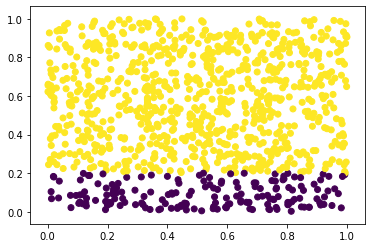

In [5]:
plt.figure();
plt.scatter(data1[:,0],data1[:,1],c = data1[:,2]);

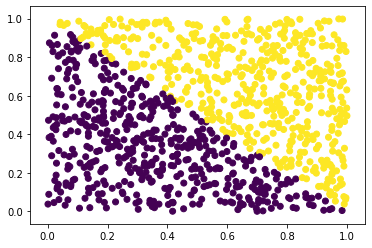

In [6]:
plt.figure();
plt.scatter(data2[:,0],data2[:,1],c = data2[:,2]);

In [7]:
N = 50;
line = np.linspace(0,1,N);
xx,yy = np.meshgrid(line,line);
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T;
print(Xgrid.shape)

(2500, 2)


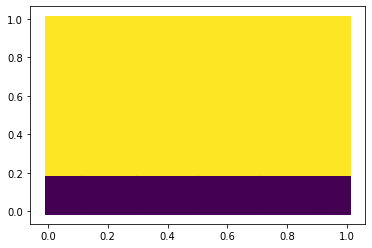

In [8]:
out1 = np.zeros((len(Xgrid),3));
for i in range(len(Xgrid)):
    y = DT.Pred(Xgrid[i,:],head1);
    out1[i,0:2] = Xgrid[i,:];
    out1[i,2] = y;
    
plt.figure();
plt.scatter(out1[:,0],out1[:,1],c = out1[:,2],marker = 's');

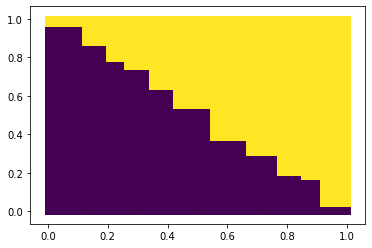

In [9]:
out2 = np.zeros((len(Xgrid),3));
for i in range(len(Xgrid)):
    y = DT.Pred(Xgrid[i,:],head2);
    out2[i,0:2] = Xgrid[i,:];
    out2[i,2] = y;
    
plt.figure();
plt.scatter(out2[:,0],out2[:,1],c = out2[:,2],marker = 's');

## Q2-7

[[3.20000000e+01 1.17809735e-01]
 [1.28000000e+02 1.12278761e-01]
 [5.12000000e+02 5.80752212e-02]
 [2.04800000e+03 2.59955752e-02]
 [8.19200000e+03 1.32743363e-02]]


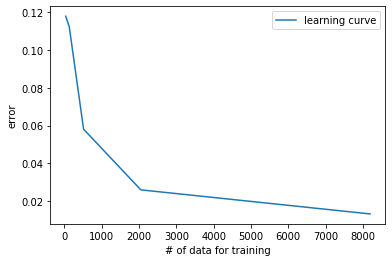

In [10]:
DT = DecisionTree();
databig = np.loadtxt('Dbig.txt');

np.random.shuffle(databig);

training_number = [32,128,512,2048,8192];
training_data = [0] * len(training_number);
for i in range(len(training_number)):
    training_data[i] = databig[:training_number[i],:];
test_data = databig[training_number[-1]:,:];

## generating trees
head_big = [0] * len(training_number);
for i in range(len(training_number)):
    head_big[i] = DecTreeNode(None);
    DT.NodeTraining(head_big[i],training_data[i]);
    
    #DT.TreeVisual(head_big[i])

## test
test = test_data[:,:2];
result = test_data[:,2];

def classfication_rate(y1,y2):
    return np.mean(y1 != y2);

error = [];
for i in range(len(training_number)):
    out = np.zeros(result.shape)
    for row in range(len(test)):
        out[row] = DT.Pred(test[row],head_big[i]);
        
    error += [[training_number[i], classfication_rate(result,out)]];
    
error = np.array(error);
print(error)
plt.figure();
plt.plot(error[:,0],error[:,1],label = 'learning curve')
plt.xlabel("# of data for training")
plt.ylabel("error");
plt.legend();




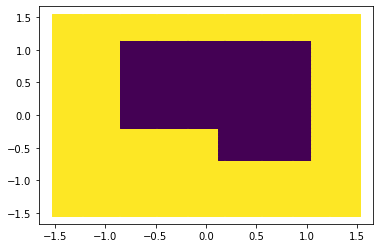

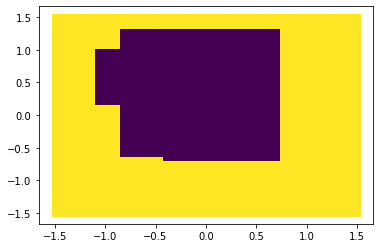

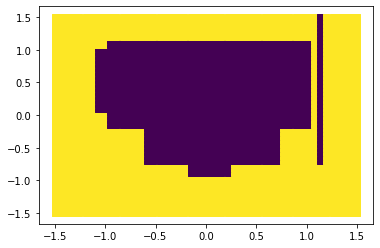

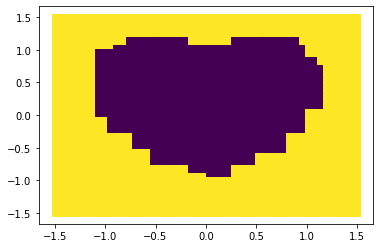

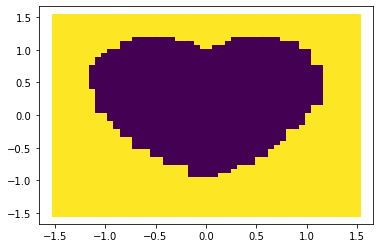

In [11]:
## generate a decision boundary

x1_min = np.min(databig[:,0]);
x1_max = np.max(databig[:,0]);
x2_min = np.min(databig[:,1]);
x2_max = np.max(databig[:,1]);

N = 50;
#line = np.linspace(0,1,N);
#xx,yy = np.meshgrid(line,line);
line1 = np.linspace(x1_min,x1_max,N);
line2 = np.linspace(x2_min,x2_max,N);
xx1,xx2 = np.meshgrid(line1,line2);
Xgrid = np.vstack((xx1.flatten(),xx2.flatten())).T;

for j in range(len(training_number)):
    out_big = np.zeros((len(Xgrid),3));
    for i in range(len(Xgrid)):
        y = DT.Pred(Xgrid[i,:],head_big[j]);
        out_big[i,0:2] = Xgrid[i,:];
        out_big[i,2] = y;        
        
    plt.figure();
    plt.scatter(out_big[:,0],out_big[:,1],c = out_big[:,2],marker = 's');
    

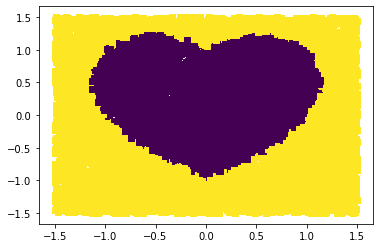

In [12]:
plt.figure()
plt.scatter(databig[:,0],databig[:,1], c = databig[:,2], marker = 's');

## Q3

In [13]:
'''
databig = np.loadtxt('Dbig.txt');
np.random.shuffle(databig);
training_number = [32,128,512,2048,8192];
L = len(training_number);
#training_data = [0] * len(training_number);
for i in range(L):
    filename = ('Dbig' + str(training_number[i]) + '.csv');
    np.savetxt(filename, databig[:training_number[i],:], delimiter=",");
    
np.savetxt('Dbig_test.csv',databig[training_number[-1]:,:], delimiter=",");
'''

'\ndatabig = np.loadtxt(\'Dbig.txt\');\nnp.random.shuffle(databig);\ntraining_number = [32,128,512,2048,8192];\nL = len(training_number);\n#training_data = [0] * len(training_number);\nfor i in range(L):\n    filename = (\'Dbig\' + str(training_number[i]) + \'.csv\');\n    np.savetxt(filename, databig[:training_number[i],:], delimiter=",");\n    \nnp.savetxt(\'Dbig_test.csv\',databig[training_number[-1]:,:], delimiter=",");\n'

[[3.200e+01 1.100e+01 2.915e-01]
 [1.280e+02 2.900e+01 1.023e-01]
 [5.120e+02 5.500e+01 4.260e-02]
 [2.048e+03 1.170e+02 2.380e-02]
 [8.192e+03 2.650e+02 1.770e-02]]


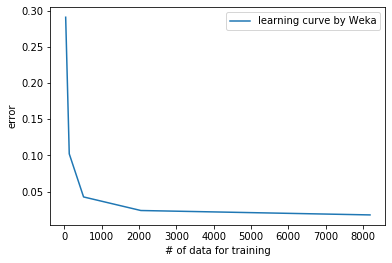

In [14]:
Weka_out = np.array([[32, 11, 0.2915], [128, 29, 0.1023], [512, 55, 0.0426], [2048, 117, 0.0238], [8192, 265, 0.0177]]);
print(Weka_out);

plt.figure();
plt.plot(Weka_out[:,0], Weka_out[:,2], label = 'learning curve by Weka');
plt.xlabel("# of data for training")
plt.ylabel("error");
plt.legend();

## Q2.2

[0, 'null', 'null']


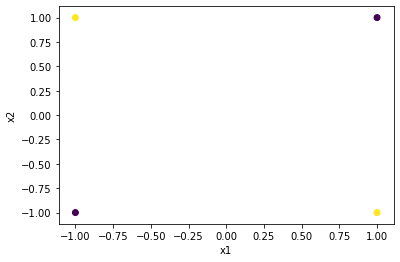

In [15]:
no_split = np.array([[1,1,0],[-1,-1,0],[1,-1,1],[-1,1,1]]);
#no_split = np.array([[1,1,1],[1,-1,0]]);
DT = DecisionTree();
head_split = DecTreeNode(None);

DT.NodeTraining(head_split, no_split);
DT.TreeVisual(head_split)
plt.figure();
plt.scatter(no_split[:,0], no_split[:,1], c= no_split[:,2]);
plt.xlabel('x1');
plt.ylabel('x2');